<a href="https://colab.research.google.com/github/Anshad-Aziz/Internshala-Final-Project/blob/main/Internshala_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#importing Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt         # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
train=pd.read_csv('/content/train.csv')
test=pd.read_csv('/content/test.csv')

In [3]:
train.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [4]:
test.columns

Index(['ID', 'age', 'job', 'marital', 'education', 'default', 'balance',
       'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [5]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
print(train.shape)
print(test.shape)

(31647, 18)
(13564, 17)


In [7]:
print(train.dtypes)

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object


In [8]:
train['subscribed'].value_counts()

no     27932
yes     3715
Name: subscribed, dtype: int64

In [9]:
train['subscribed'].value_counts(normalize=True)

no     0.882611
yes    0.117389
Name: subscribed, dtype: float64

<Axes: >

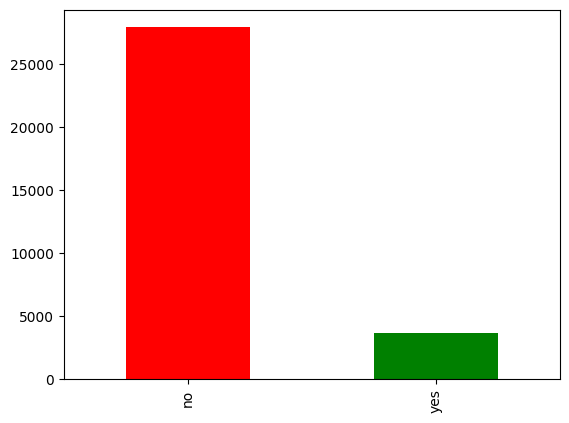

In [10]:
train['subscribed'].value_counts().plot.bar(color=['red','green'])

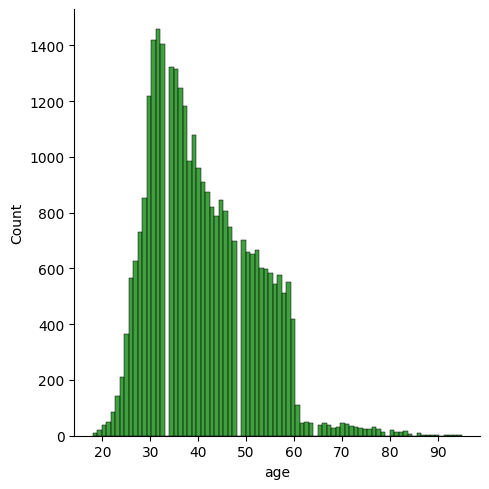

In [11]:
sns.displot(train["age"],color="green")

<Axes: >

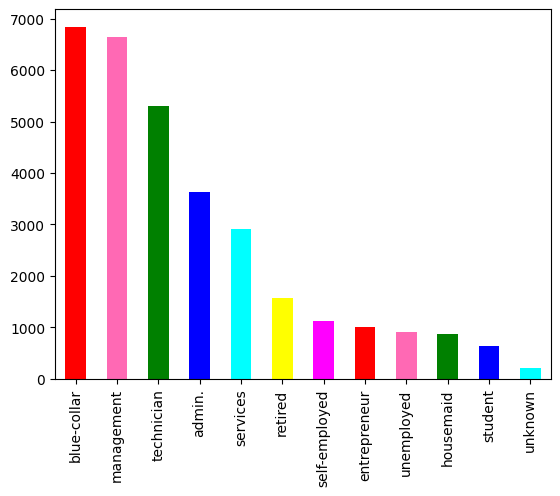

In [13]:
train['job'].value_counts().plot.bar(color=['red','hotpink','green','blue','cyan','yellow','magenta'])

<Axes: >

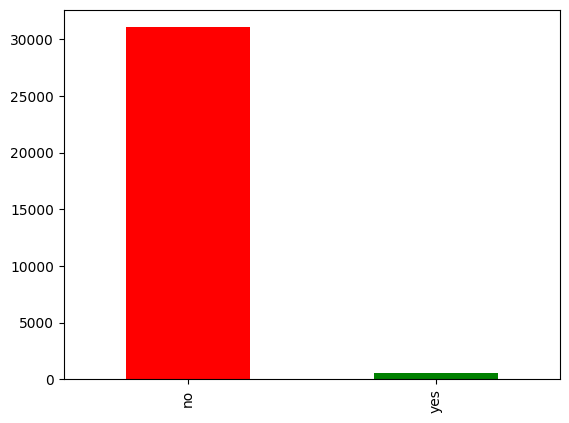

In [15]:
train['default'].value_counts().plot.bar(color=['red','green'])

In [17]:
print(pd.crosstab(train['job'],train['subscribed']))

subscribed       no  yes
job                     
admin.         3179  452
blue-collar    6353  489
entrepreneur    923   85
housemaid       795   79
management     5716  923
retired        1212  362
self-employed   983  140
services       2649  254
student         453  182
technician     4713  594
unemployed      776  129
unknown         180   26


Text(0, 0.5, 'percentage')

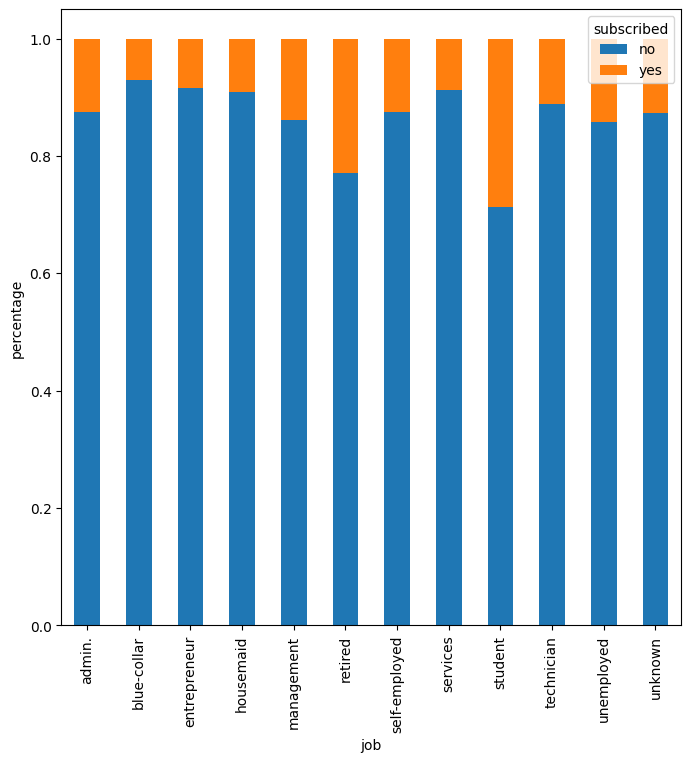

In [18]:
job=pd.crosstab(train['job'],train['subscribed'])
job.div(job.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(8,8))
plt.xlabel('job')
plt.ylabel('percentage')

subscribed     no   yes
default                
no          27388  3674
yes           544    41


Text(0, 0.5, 'Percentage')

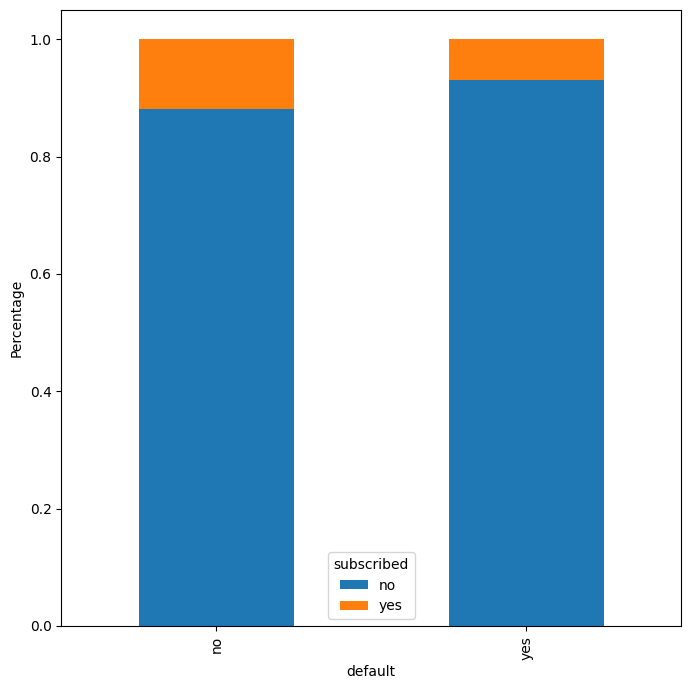

In [19]:
print(pd.crosstab(train['default'],train['subscribed']))

default=pd.crosstab(train['default'],train['subscribed'])
default.div(default.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8,8))
plt.xlabel('default')
plt.ylabel('Percentage')

In [20]:
train['subscribed'].replace('no',0,inplace=True)
train['subscribed'].replace('yes',1,inplace=True)

<Axes: >

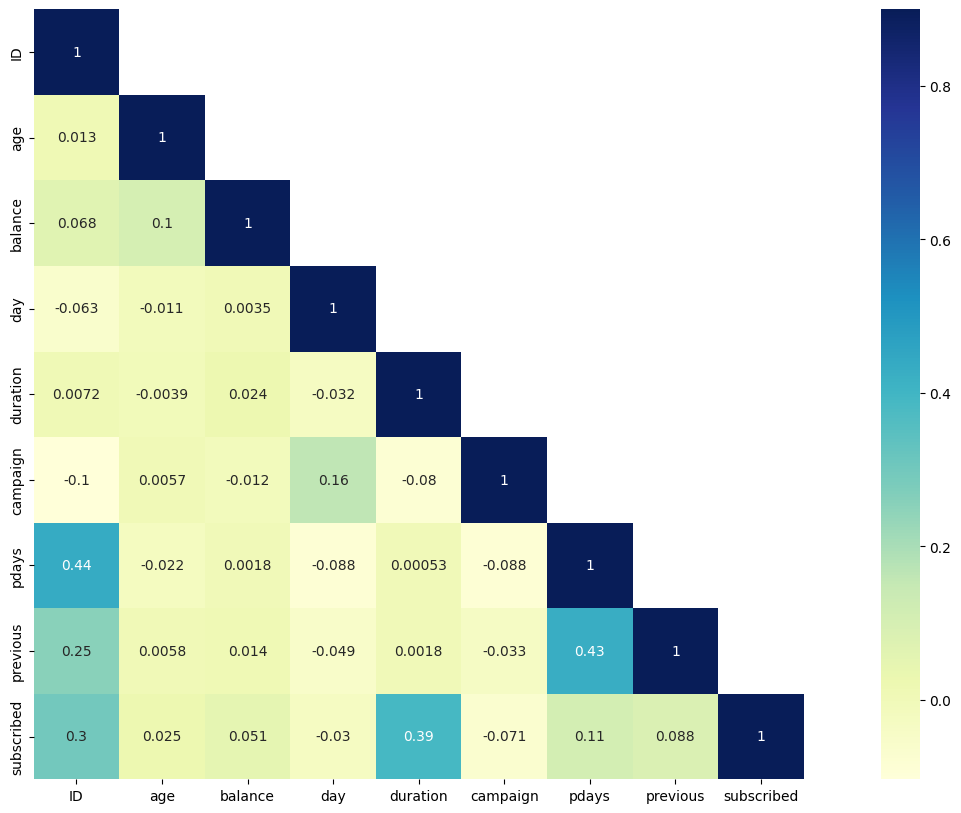

In [23]:
corr=train.corr()
mask=np.array(corr)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corr,mask=mask,vmax=.9,square=True,annot=True,cmap='YlGnBu')

In [24]:
train.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [25]:
target=train['subscribed']
train=train.drop('subscribed',1)

In [31]:
train = pd.get_dummies(train)

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_val,y_train,y_val=train_test_split(train,target,test_size=0.2,random_state=12)

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
model=LogisticRegression()

In [36]:
model.fit(X_train,y_train)

LogisticRegression()

In [37]:
prediction=model.predict(X_val)

In [38]:
from sklearn.metrics import accuracy_score

In [39]:
accuracy_score(y_val,prediction)

0.8908372827804107

In [40]:
from sklearn.tree import DecisionTreeClassifier

In [41]:
clf=DecisionTreeClassifier(max_depth=4,random_state=0)

In [42]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [43]:
predict=clf.predict(X_val)

In [44]:
accuracy_score(y_val,predict)

0.9042654028436019

In [45]:
test=pd.get_dummies(test)

In [46]:
test_prediction=clf.predict(test)

In [47]:
submission=pd.DataFrame()

In [48]:
submission['ID'] = test['ID']
submission['subscribed'] = test_prediction

In [49]:
submission['subscribed'].replace(0,'no',inplace=True)
submission['subscribed'].replace(1,'yes',inplace=True)

In [50]:
submission.to_csv('submission.csv', header=True, index=False)